## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### t-SNE - Demo 1

* Utilização do algoritmo t-SNE em caso de uso com imagens.
* Base de dados MNIST, muito comum para exemplos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

from sklearn.datasets import load_digits

%matplotlib inline

### Carregar a base de dados e inspecionar algumas informações

In [2]:
digits = load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(np.unique(digits.target, return_counts=True))

(1797, 64)
(1797, 8, 8)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


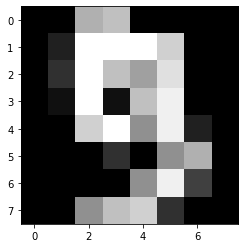

In [3]:
plt.gray()
plt.imshow(digits.images[9])

### Aplicar t-SNE

In [4]:
%%time
tsne = TSNE(perplexity=30)
digits_transformed = tsne.fit_transform(digits.data)
print(digits_transformed.shape)

(1797, 2)
Wall time: 7.51 s


In [5]:
df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
df['label'] = digits.target
df.head()

,x,y,label
0,-59.334339,20.440245,0
1,14.738831,-16.583912,1
2,25.695372,11.090586,2
3,-2.930046,37.849426,3
4,-1.846248,-51.618916,4


### Plotar resultados

In [6]:
plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

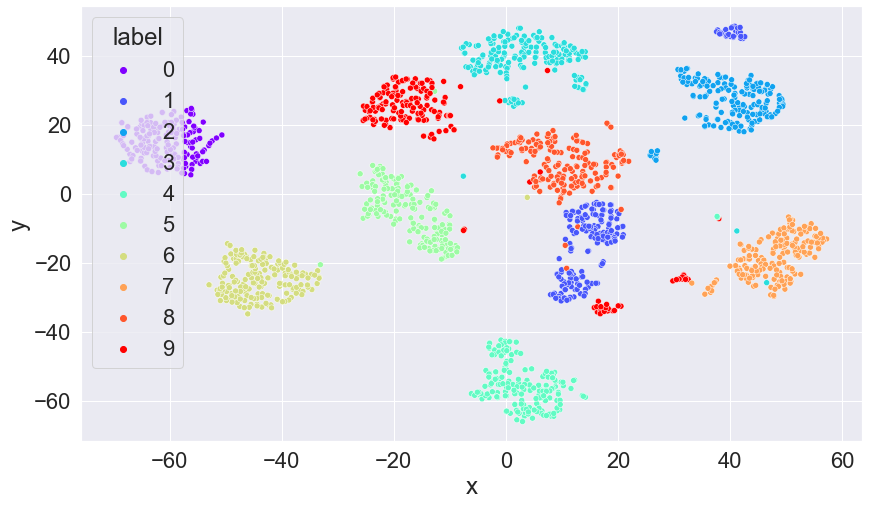

In [7]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')

### Testando hiperparâmetros

Variando perplexity

In [8]:
def run_tsne_and_plot(perplexity, digits):
    tsne = TSNE(perplexity=perplexity)
    digits_transformed = tsne.fit_transform(digits.data)
    
    df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
    df['label'] = digits.target
    
    _ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')

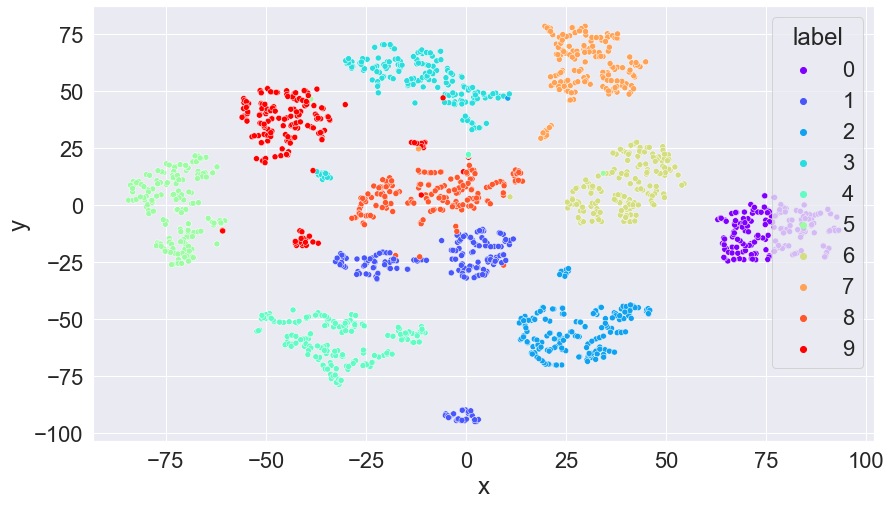

In [9]:
run_tsne_and_plot(10, digits)

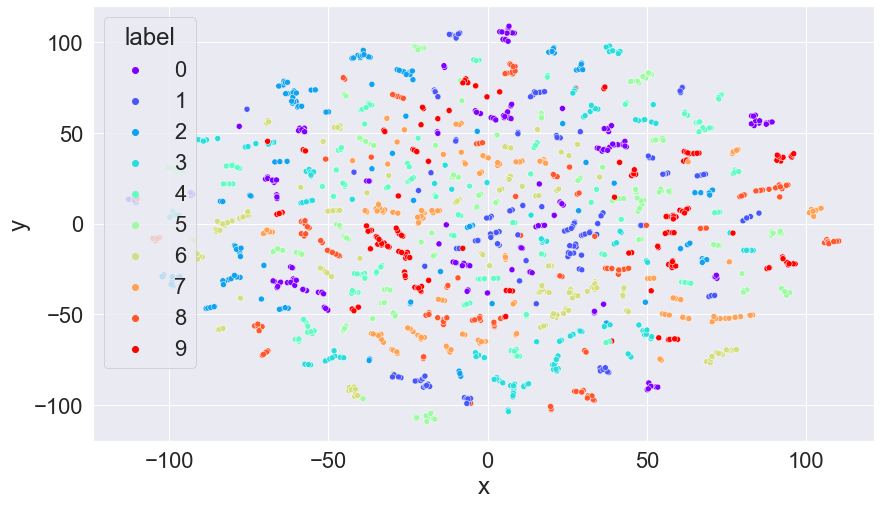

In [10]:
run_tsne_and_plot(1, digits)

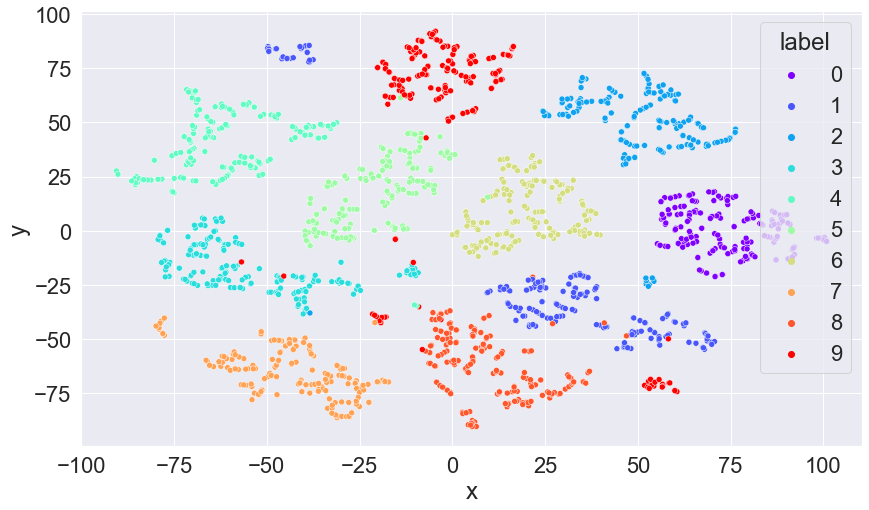

In [11]:
run_tsne_and_plot(5, digits)

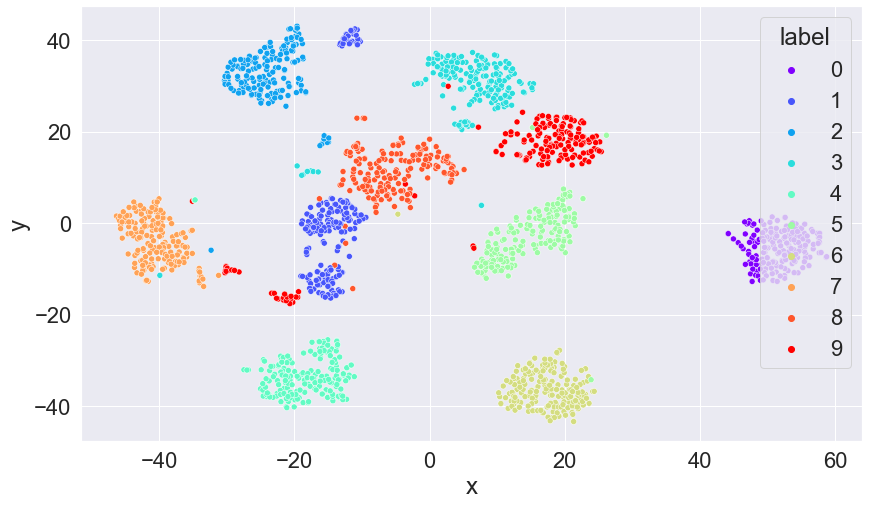

In [13]:
run_tsne_and_plot(50, digits)